# Distribution of AirBnB Prices based on a Variety of Factors:
### Rating, Construction Year, Host Verification, Cancellation Policy, Room Type, Best/Worst Rated + Room Type 

#### Do different booking parameters appear to have an effect on price?

#### Price by Review Rating
AirBnB property ratings are an effective tool to determine the likeliness of a pleasant AirBnB stay.  Boxplots were constructed to help visualize if "Price" changes depending on the "Rating" of a property.  
Question: Are better rated properties more expensive in general? 
Conclusion: The boxplots show no obvious relationship between "Ratings" and "Price".  

#### Price by Host Verification
Host verification helps provides an initial level of trust in a host's listing.  Currently policy is that all hosts and guests are verified, but this dataset must have been aquired prior to this policy implementation.  These is an approximate 50/50 split of verified and unconfirmed in this dataset.  
Boxplots were constructed to help visualize if "Price" changes depending on if the host is verified.
Question: Do properties with verified Hosts charge more than unverified hosts? 
Conclusion: The boxplots show no obvious relationship between "Host Verification" and "Price".

#### Price by Cancellation Policy
AirBnB provides a range of cancellation policies from strict to flexible.  A Host may desire the security of a more strict policy, whereas a guest may prefer a more flexible cancellation policy for vacation changes. 
Boxplots were constructed to visualize if "Price" changes based on cancellation policy.
Question: Do prices decrease with a more strict cancellation policy?
Conclusion: The boxplots show no obvious relationship between "Cancellation Policy" and "Price".

#### Price by Construction Year 
Question:  Can newer builds charge more for AirBnB rentals?
Conclusion: The boxplots show no obvious trend in "Price" based on "Construction Year".

#### Price by Room Type
Question: Do different room types typically charge more for their property?
Conclusion: 



In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [19]:
# import cleaned_airbnb_data.csv
filepath = Path("Resources\cleaned_airbnb_data.csv")
airbnb_df = pd.read_csv(filepath)

In [20]:
airbnb_df_sl = airbnb_df
airbnb_df_sl['neighbourhood group'].value_counts()

neighbourhood group
Brooklyn         34049
Manhattan        33917
Queens           11058
Bronx             2267
Staten Island      815
Name: count, dtype: int64

In [4]:
# Defining a function to create a boxplot and summary statistics DataFrame based on two columns

def makebp_sl(x,y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    num_sl = len(categories_sorted_sl)
    
    # Setting up empty lists for summary statistics
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data_sl
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[airbnb_df_sl[x] == categories_sorted_sl[z], [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl= 0
            maxi_sl= 0
        
        # Adding the summary statistics into lists
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting the boxplots
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show


,Property Count,Median,Mean,Minimum,Maximum
review rate number,,,,,
1,7019,637,631,50,1200
2,18684,632,629,50,1200
3,18794,628,625,50,1200
4,18817,625,626,50,1200
5,18792,618,622,50,1200


Text(0.5, 1.0, 'Price by Review Rating')

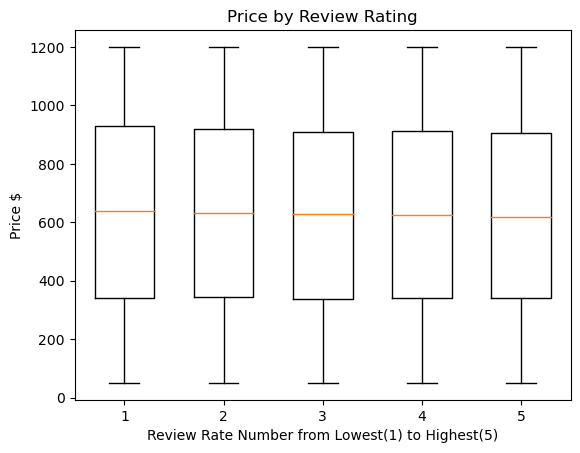

In [5]:
# Price by Review Rating

# Changing Review Rate Number to integer
airbnb_df_sl = airbnb_df_sl.astype({'review rate number': "int64"})

# Defining the Variables
x = 'review rate number'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Review Rate Number from Lowest(1) to Highest(5)")
plt.title("Price by Review Rating")

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,9333,625,626,50,1200
verified,9459,610,617,50,1200


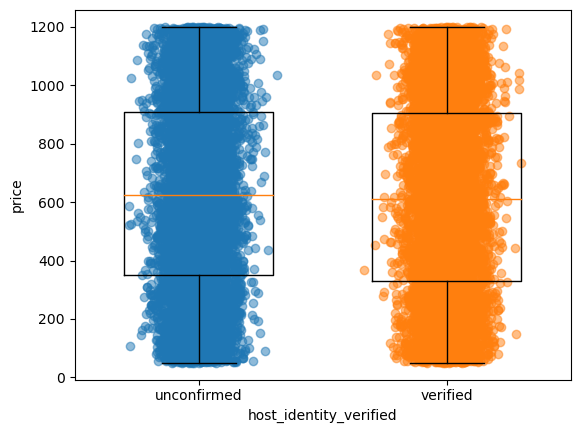

In [21]:
v = "review rate number"
w = 5
x = "host_identity_verified"
y = "price"
makebp_4var_sl(v,w,x,y)

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,41062,627,627,50,1200
verified,41044,625,626,50,1200


Text(0.5, 1.0, 'Price by Host Verification Status')

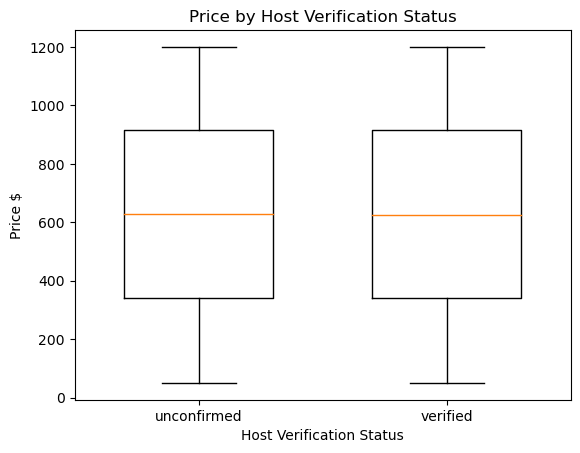

In [6]:
# Price by Host Verification

# Defining the Variables
x = 'host_identity_verified'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Price by Host Verification Status")

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,6209,629,624,50,1200
moderate,6307,615,624,50,1200
strict,6276,611,617,50,1200


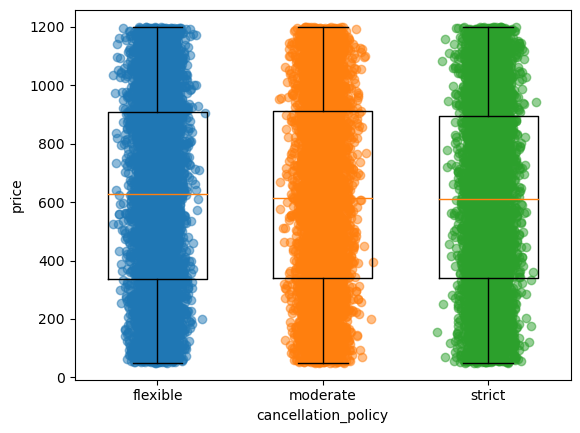

In [22]:
# price by cancellatin policy 5 rated
v = "review rate number"
w = 5
x = "cancellation_policy"
y = "price"
makebp_4var_sl(v,w,x,y)

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,27291,629,628,50,1200
moderate,27479,622,625,50,1200
strict,27336,628,626,50,1200


Text(0.5, 1.0, 'Price by Cancellation Policy')

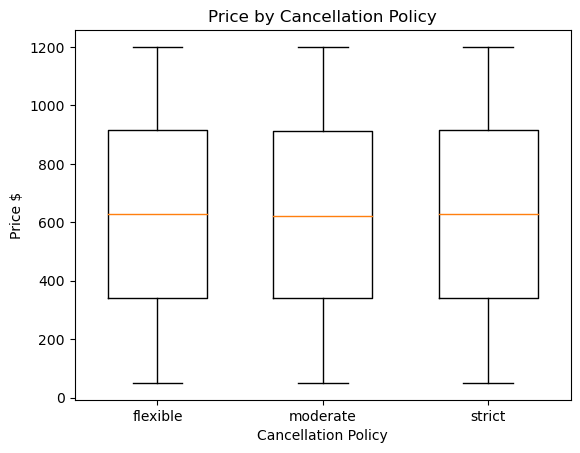

In [7]:
# Price by Cancellation Policy

# Defining the Variables
x = 'cancellation_policy'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Price by Cancellation Policy")

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003.0,928,588,609,50,1195
2004.0,979,644,634,55,1199
2005.0,937,617,612,50,1200
2006.0,984,603,619,51,1198
2007.0,889,612,612,50,1199
2008.0,945,688,653,50,1200
2009.0,867,622,622,52,1198
2010.0,893,615,622,54,1200
2011.0,946,628,627,50,1192


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

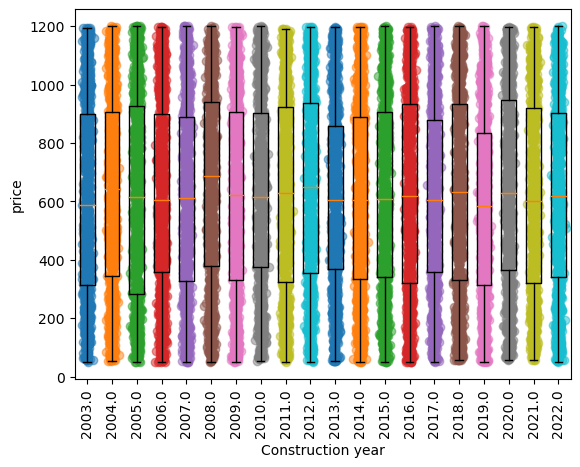

In [26]:
v = "review rate number"
w = 5
x = "Construction year"
y = "price"
makebp_4var_sl(v,w,x,y)
plt.xticks(rotation=90)
plt.scatter(show=False)

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4095,626,623,50,1200
2004,4035,643,633,50,1199
2005,4103,626,623,50,1200
2006,4208,630,630,50,1199
2007,4074,633,630,50,1200
2008,4218,638,639,50,1200
2009,4120,627,622,50,1200
2010,4120,615,620,50,1200
2011,4064,632,634,50,1200


Text(0.5, 1.0, 'Price by Construction Year')

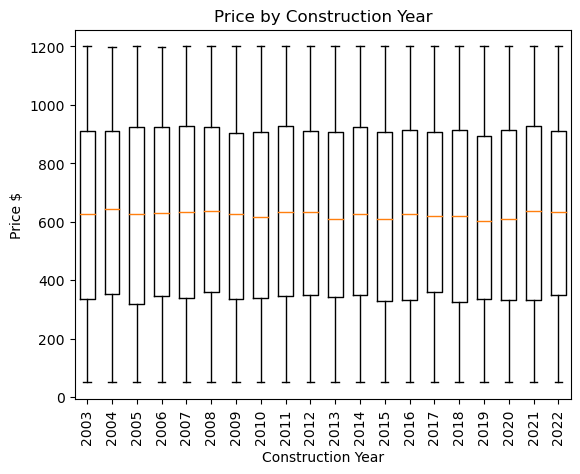

In [8]:
# change 'Construction year' from float to int
airbnb_df_sl = airbnb_df_sl.astype({'Construction year': "int64"})

# Defining the Variables
x = 'Construction year'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Price by Construction Year")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,43335,625,625,50,1200
Hotel room,113,643,668,50,1193
Private room,37023,626,627,50,1200
Shared room,1635,656,629,50,1199


Text(0.5, 1.0, 'Price by Room Type')

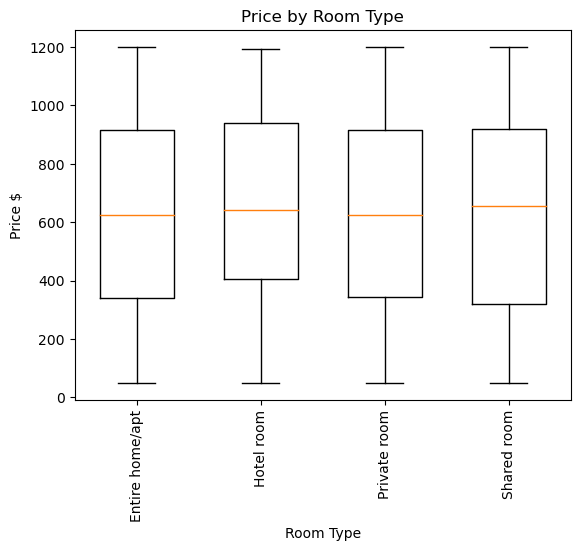

In [9]:
# Price by Room Type

# Defining the Variables
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.title("Price by Room Type")

In [10]:
# Defining a function to create a boxplot and summary statistics DataFrame based on three columns and one variable

def makebp_4var_sl(v, w, x, y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
    num_sl = len(categories_sorted_sl)
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl[x] == categories_sorted_sl[z]) & (airbnb_df_sl[v] == w), [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl=0
            maxi_sl=0
            
        # Adding the summary statistics into lists    
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting boxplot and scatter
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        
        # Setting variable for scatter plot overlay
        x_val_sl = np.random.normal(k + 1, 0.08, len(y_val_sl))
        
        # Making boxplots with scatter overlay
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        plt.scatter(x_val_sl,y_val_sl, alpha=0.5)
        
        #Sets position for next boxplot
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,9873,610,620,50,1200
Hotel room,32,673,666,157,1149
Private room,8523,624,624,50,1200
Shared room,364,644,621,51,1194


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 5 (Best)')

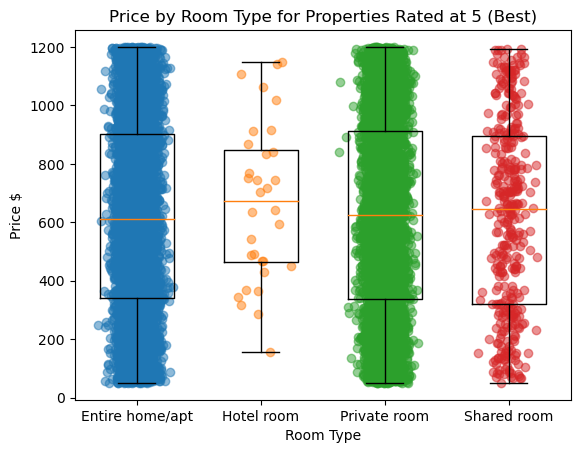

In [11]:
# Price by Room Type with Rating = 5

# Defining the Variables
v = 'review rate number'
w = 5
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var function
makebp_4var_sl(v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 5 (Best)")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,3819,631,628,50,1200
Hotel room,0,0,0,0,0
Private room,3093,638,631,50,1200
Shared room,107,766,702,50,1199


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 1 (Worst)')

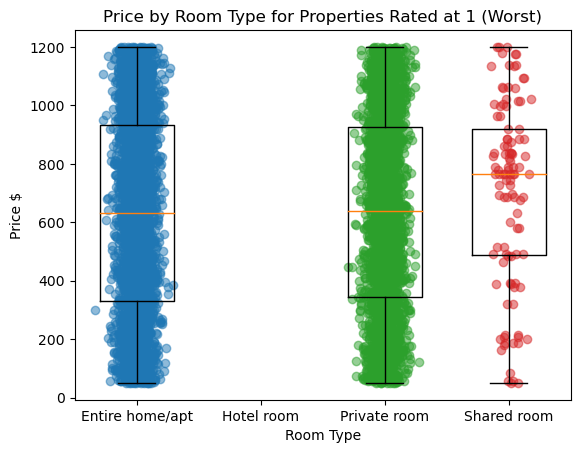

In [12]:
# Price by Room Type with Rating 1

# Defining the Variables
v = 'review rate number'
w = 1
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var function
makebp_4var_sl(v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 1 (Worst)")

In [13]:
# remove rows with service fee at zero
airbnb_df_sl2 = airbnb_df_sl.loc[airbnb_df_sl['service fee'] >0,:]
airbnb_df_sl2.reset_index(drop=True)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81901,57358028,"Room in Queens, NY, near LGA.",56457739998,verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,...,196.0,1.0,239.0,2019-06-29,8.58,2,2.0,361.0,1. Please clean-up after yourself in the kitch...,NaN
81902,57358580,Cozy home away from home,60176837202,verified,NaN,Queens,Edgemere,40.59380,-73.77373,United States,...,189.0,1.0,76.0,2019-06-27,2.84,1,1.0,324.0,NaN,NaN
81903,57359133,Central Park Views - Private Room & Bathroom,68411243647,verified,NaN,Manhattan,Upper West Side,40.79712,-73.96117,United States,...,141.0,1.0,4.0,2017-08-15,0.14,4,1.0,0.0,My roommates and I take a lot of pride in keep...,NaN
81904,57359685,Ultimate 50th Floor Downtown Penthouse - 4000...,95625271612,verified,NaN,Manhattan,SoHo,40.72318,-74.00223,United States,...,209.0,2.0,21.0,2019-07-01,0.74,4,2.0,343.0,#NAME?,NaN


,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4095,125,124,0,240
2004,4035,128,126,0,240
2005,4103,125,124,0,240
2006,4208,126,126,0,240
2007,4074,127,125,0,240
2008,4218,127,127,0,240
2009,4120,125,124,0,240
2010,4120,123,123,0,240
2011,4064,126,126,0,240


Text(0.5, 1.0, 'Service Fee by Construction Year')

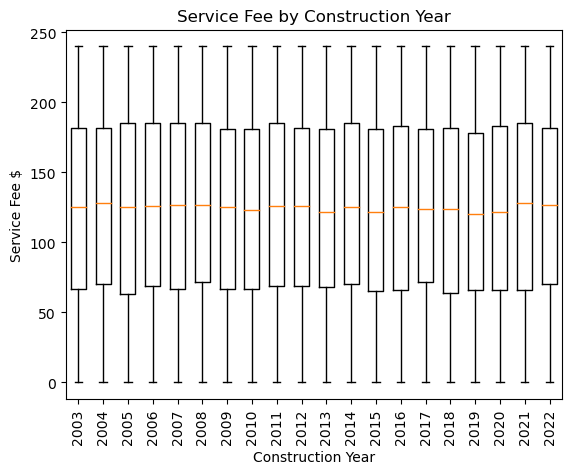

In [14]:
# Service fees based on year of construction

# Defining the Variables
x = 'Construction year'
y = 'service fee'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Service Fee $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Service Fee by Construction Year")


In [17]:
# Defining a linear regression function and scatter plot

def lin_reg_sl(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

The r-value is: 0.9999908975794347


Text(0.5, 1.0, 'Service Fee vs Price')

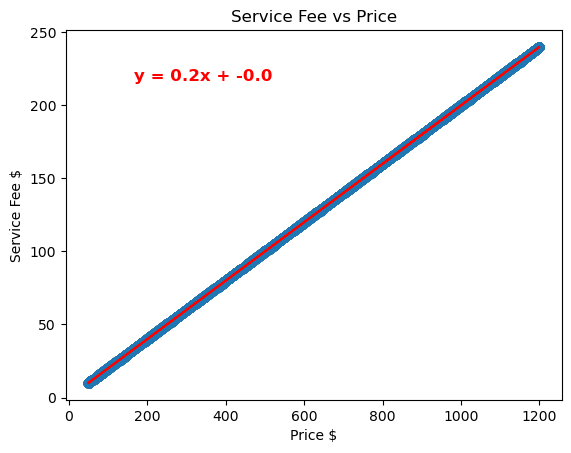

In [18]:
# Service fee by Price Scatter Plot

# Defining the Variables
x = airbnb_df_sl2["price"]
y = airbnb_df_sl2['service fee']

# Scatter plot and linear regression
lin_reg_sl(x,y)
plt.xlabel("Price $")
plt.ylabel("Service Fee $")
plt.title("Service Fee vs Price")